In [1]:
import pandas as pd
import numpy as np
import cv2
import os

In [2]:
qr_df = pd.DataFrame(columns = ["id", "Location", "Camera", "File Name", "Image", "Image Width", "Image Height"])

In [3]:
## iterating via directory

directory = '../Datasets/Image'
idx = 0
for loc_name in os.listdir(directory):
    loc_path = directory+"/"+loc_name
    if os.path.isdir(loc_path):
        for cam_name in os.listdir(loc_path):
            cam_path = loc_path+"/"+cam_name
            if os.path.isdir(cam_path):
                for filename in os.listdir(cam_path):
                    img_name, img_ext = os.path.splitext(filename)
                    if img_ext == ".JPG" or img_ext == ".PNG":
                        img_path = cam_path+"/"+filename
                        img = np.array(cv2.imread(img_path))
                        qr_df = qr_df.append({
#                             "id":idx,
                            "Location":loc_name,
                            "Camera":cam_name,
                            "File Name":filename,
                            "Image":img_name,
                            "Image Width":img.shape[0],
                            "Image Height":img.shape[1]
                        }, ignore_index = True)
                        idx += 1
qr_df

,id,Location,Camera,File Name,Image,Image Width,Image Height
0,0,LL_115-116,NikonD780,DSC_3125.JPG,DSC_3125,4024,6048
1,1,LL_115-116,NikonD780,DSC_3460.JPG,DSC_3460,6048,4024
2,2,LL_115-116,NikonD780,DSC_3452.JPG,DSC_3452,4024,6048
3,3,LL_115-116,NikonD780,DSC_3200.JPG,DSC_3200,4024,6048
4,4,LL_115-116,NikonD780,DSC_3207.JPG,DSC_3207,4024,6048
...,...,...,...,...,...,...,...
450,450,LL_119-120,NikonD7000_18mm,DSC_1035.JPG,DSC_1035,3264,4928
451,451,LL_119-120,NikonD7000_18mm,DSC_1089.JPG,DSC_1089,3264,4928
452,452,LL_119-120,NikonD7000_18mm,DSC_1100.JPG,DSC_1100,3264,4928
453,453,LL_119-120,NikonD7000_18mm,DSC_1080.JPG,DSC_1080,3264,4928


In [4]:
qr_df = qr_df.drop_duplicates(subset=['Image'], keep='first')
qr_df

,id,Location,Camera,File Name,Image,Image Width,Image Height
0,0,LL_115-116,NikonD780,DSC_3125.JPG,DSC_3125,4024,6048
1,1,LL_115-116,NikonD780,DSC_3460.JPG,DSC_3460,6048,4024
2,2,LL_115-116,NikonD780,DSC_3452.JPG,DSC_3452,4024,6048
3,3,LL_115-116,NikonD780,DSC_3200.JPG,DSC_3200,4024,6048
4,4,LL_115-116,NikonD780,DSC_3207.JPG,DSC_3207,4024,6048
...,...,...,...,...,...,...,...
450,450,LL_119-120,NikonD7000_18mm,DSC_1035.JPG,DSC_1035,3264,4928
451,451,LL_119-120,NikonD7000_18mm,DSC_1089.JPG,DSC_1089,3264,4928
452,452,LL_119-120,NikonD7000_18mm,DSC_1100.JPG,DSC_1100,3264,4928
453,453,LL_119-120,NikonD7000_18mm,DSC_1080.JPG,DSC_1080,3264,4928


In [5]:
## bbox labels
qr_df['x'] = -1
qr_df['y'] = -1
qr_df['w'] = -1
qr_df['h'] = -1
directory = '../Datasets/bboxes_for_SUIT_images_2021-05-10-02-29-37'
for bboxes_txt in os.listdir(directory):
    txt_path = directory+"/"+bboxes_txt
    img_name = os.path.splitext(bboxes_txt)[0]
    # print(txt_path)
    if img_name == 'DSC_6775':
        continue

    coord = np.loadtxt(txt_path)
    # print(txt_in)

    records = qr_df.loc[qr_df["Image"]==img_name]

    image = cv2.imread(img_path)
    hor_len = int(records['Image Height'])
    vert_len = int(records['Image Width'])

    xs = int(coord[1] * hor_len)
    ys = int(coord[2] * vert_len)

    h = int(coord[3] * hor_len)
    w = int(coord[4] * vert_len)

    x1 = xs -int(.5*h)
    x2 = xs +int(.5*h)

    y1= ys -int(.5*w)
    y2 = ys+int(.5*w)

    qr_df.loc[qr_df["Image"]==img_name, 'x'] = x1
    qr_df.loc[qr_df["Image"]==img_name, 'y'] = y1
    qr_df.loc[qr_df["Image"]==img_name, 'w'] = h
    qr_df.loc[qr_df["Image"]==img_name, 'h'] = w

<ipython-input-5-8b798ffb0d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qr_df['x'] = -1
<ipython-input-5-8b798ffb0d2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qr_df['y'] = -1
<ipython-input-5-8b798ffb0d2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [6]:
qr_df

,id,Location,Camera,File Name,Image,Image Width,Image Height,x,y,w,h
0,0,LL_115-116,NikonD780,DSC_3125.JPG,DSC_3125,4024,6048,3882,230,350,355
1,1,LL_115-116,NikonD780,DSC_3460.JPG,DSC_3460,6048,4024,1282,3163,528,565
2,2,LL_115-116,NikonD780,DSC_3452.JPG,DSC_3452,4024,6048,1911,3116,549,545
3,3,LL_115-116,NikonD780,DSC_3200.JPG,DSC_3200,4024,6048,57,3330,440,478
4,4,LL_115-116,NikonD780,DSC_3207.JPG,DSC_3207,4024,6048,934,869,393,412
...,...,...,...,...,...,...,...,...,...,...,...
450,450,LL_119-120,NikonD7000_18mm,DSC_1035.JPG,DSC_1035,3264,4928,973,1725,799,749
451,451,LL_119-120,NikonD7000_18mm,DSC_1089.JPG,DSC_1089,3264,4928,1850,6,1305,1154
452,452,LL_119-120,NikonD7000_18mm,DSC_1100.JPG,DSC_1100,3264,4928,1027,1014,865,919
453,453,LL_119-120,NikonD7000_18mm,DSC_1080.JPG,DSC_1080,3264,4928,1714,1574,776,787


In [7]:
!rm out.csv
!rm ../Datasets/qr_label.csv

In [8]:
out_qrdf = qr_df[qr_df["x"]!=-1]

out_qrdf.to_csv("out.csv")

out_qrdf.to_csv("../Datasets/qr_label.csv")

In [9]:
out_qrdf

,id,Location,Camera,File Name,Image,Image Width,Image Height,x,y,w,h
0,0,LL_115-116,NikonD780,DSC_3125.JPG,DSC_3125,4024,6048,3882,230,350,355
1,1,LL_115-116,NikonD780,DSC_3460.JPG,DSC_3460,6048,4024,1282,3163,528,565
2,2,LL_115-116,NikonD780,DSC_3452.JPG,DSC_3452,4024,6048,1911,3116,549,545
3,3,LL_115-116,NikonD780,DSC_3200.JPG,DSC_3200,4024,6048,57,3330,440,478
4,4,LL_115-116,NikonD780,DSC_3207.JPG,DSC_3207,4024,6048,934,869,393,412
...,...,...,...,...,...,...,...,...,...,...,...
450,450,LL_119-120,NikonD7000_18mm,DSC_1035.JPG,DSC_1035,3264,4928,973,1725,799,749
451,451,LL_119-120,NikonD7000_18mm,DSC_1089.JPG,DSC_1089,3264,4928,1850,6,1305,1154
452,452,LL_119-120,NikonD7000_18mm,DSC_1100.JPG,DSC_1100,3264,4928,1027,1014,865,919
453,453,LL_119-120,NikonD7000_18mm,DSC_1080.JPG,DSC_1080,3264,4928,1714,1574,776,787


(6048, 4024, 3)
[[1282 3163 1810 3728]]
[[1282 3163 1810 3728]]
(1282, 3163, 1810, 3728)


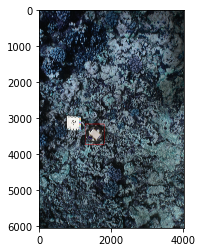

In [10]:
# getting an sample
import matplotlib.pyplot as plt
from PIL import Image
directory = '../Datasets/Image'
# records = out_qrdf[out_qrdf['Image'] == 'DSC_3201']
records = out_qrdf[out_qrdf.index == 1]
img_path = directory + "/" + str(records["Location"].values[0]) + "/" + \
                   str(records["Camera"].values[0]) + "/" + str(records["File Name"].values[0])
img = cv2.imread(img_path)
boxes = records[['x', 'y', 'w', 'h']].values
print(img.shape)
boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
boxes[:, 3] = boxes[:, 1] + boxes[:, 3]
print(boxes)
# boxes[:, 0] *= img.shape[0]
# boxes[:, 1] *= img.shape[1]
# boxes[:, 2] *= img.shape[0]
# boxes[:, 3] *= img.shape[1]
print(boxes)
x1 = int(boxes[0][0])
y1 = int(boxes[0][1])
x2 = int(boxes[0][2])
y2 = int(boxes[0][3])
print((x1, y1, x2, y2))
cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0),10)
plt.imshow(img)
plt.show()